In [1]:
import numpy as np
from copy import copy

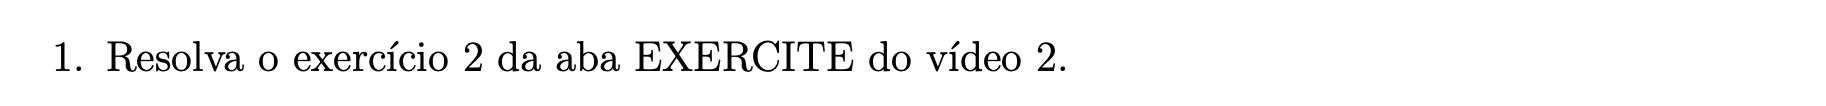

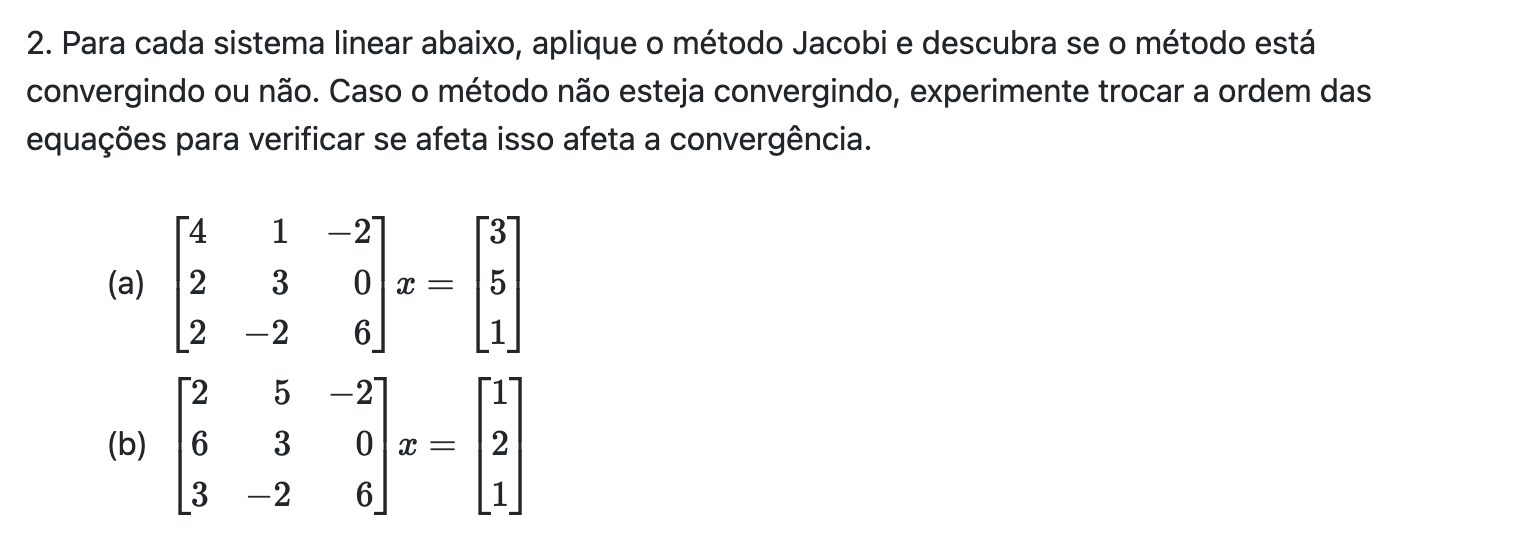

In [2]:
# a)

A = np.array([[4,1,-2], [2,3,0], [2,-2,6]])
b = np.array([3,5,1])

x0 = np.array([1,1,1]) # chute inicial

In [3]:
def calc_x1(x0, A, b):
    return (b[0] - A[0,1]*x0[1] - A[0,2]*x0[2]) / A[0,0]

def calc_x2(x0, A, b):
    return (b[1] - A[1,0]*x0[0] - A[1,2]*x0[2]) / A[1,1]

def calc_x3(x0, A, b):
    return (b[2] - A[2,0]*x0[0] - A[2,1]*x0[1]) / A[2,2]

In [4]:
# Iteração 1:

x1 = calc_x1(x0, A, b)
x2 = calc_x2(x0, A, b)
x3 = calc_x3(x0, A, b)

x0 = np.array([x1, x2, x3])
x0

array([1.        , 1.        , 0.16666667])

In [5]:
# Iteração 2:

x1 = calc_x1(x0, A, b)
x2 = calc_x2(x0, A, b)
x3 = calc_x3(x0, A, b)

x0 = np.array([x1, x2, x3])
x0

array([0.58333333, 1.        , 0.16666667])

In [6]:
# Iteração 3:

x1 = calc_x1(x0, A, b)
x2 = calc_x2(x0, A, b)
x3 = calc_x3(x0, A, b)

x0 = np.array([x1, x2, x3])
x0

array([0.58333333, 1.27777778, 0.30555556])

In [7]:
# Iteração 4:

x1 = calc_x1(x0, A, b)
x2 = calc_x2(x0, A, b)
x3 = calc_x3(x0, A, b)

x0 = np.array([x1, x2, x3])
x0

array([0.58333333, 1.27777778, 0.39814815])

In [8]:
# Iteração 5:

x1 = calc_x1(x0, A, b)
x2 = calc_x2(x0, A, b)
x3 = calc_x3(x0, A, b)

x0 = np.array([x1, x2, x3])
x0

array([0.62962963, 1.27777778, 0.39814815])

In [9]:
# Iteração 6:

x1 = calc_x1(x0, A, b)
x2 = calc_x2(x0, A, b)
x3 = calc_x3(x0, A, b)

x0 = np.array([x1, x2, x3])
x0

array([0.62962963, 1.24691358, 0.38271605])

In [10]:
# Iteração 7:

x1 = calc_x1(x0, A, b)
x2 = calc_x2(x0, A, b)
x3 = calc_x3(x0, A, b)

x0 = np.array([x1, x2, x3])
x0

array([0.62962963, 1.24691358, 0.37242798])

In [11]:
# Iteração 8:

x1 = calc_x1(x0, A, b)
x2 = calc_x2(x0, A, b)
x3 = calc_x3(x0, A, b)

x0 = np.array([x1, x2, x3])
x0

array([0.6244856 , 1.24691358, 0.37242798])

In [12]:
# Solução exata:

np.matmul(np.linalg.inv(A), b)

array([0.625, 1.25 , 0.375])

In [13]:
def gauss_jacobi(A, b, x0, tol=10**(-3), k_max=30, verbose=False):
    
    def __calcular_norma(X, inf=1):
        '''
        inf: 1 para norma infinito, 0 para norma 1
        '''
        return np.max(np.sum(np.abs(X), axis=inf))

    def __calcular_residuo(A, x, b, inf=1):
        '''
        inf: 1 para norma infinito, 0 para norma 1
        '''
        X = np.abs(np.matmul(A, x) - b.T)
        return __calcular_norma(X, inf)


    def __phi(Bj, c, x, k_max=20):
        return np.matmul(Bj, x) + c
    
    
    # Inicializa as variáveis:
    # Ax = b
    # (L + D + U)x = b
    # Dx = -(L + U)x + b
    # x = -D^-1(L + U)x + D^-1 * b

    # phi(x) = Bj * x + c
    # Bj = -D^-1(L + U)
    # c = D^-1 * b
    
    D = np.diag(np.diag(A))
    L = np.tril(A - D)
    U = np.triu(A - D)
    D_inv = np.linalg.inv(D)
    Bj = np.matmul(-D_inv, L+U)
    c = np.matmul(D_inv, b)
    
    # Verifica o critério de convergência
    
    # A norma de Bj deve ser < 1
    # Em outras palavras: Os elementos da diagonal sempre devem ser maior (em módulo)
    # do que a soma (em módulo) dos demais elementos da linha
    
    # Este critério é conhecido como critério das linhas
    # A matriz que satisfaz esta condição é chamada de matriz diagonalmente dominante por linhas
    
    if __calcular_norma(Bj) >= 1:
        print('A matriz B não é diagonalmente dominante por linhas, portanto, não há garantia de convergência')
        print('')
    
    
    # Inicia o processo iterativo:
    k = 0
    while k < k_max:
        k += 1
        
        res = __calcular_residuo(A, x0, b)
        x_new = __phi(Bj, c, x0)
        step_size = __calcular_norma(x_new - x0)
        abs_err = np.sum(np.abs(np.matmul(A, x_new) - b))
        
        if verbose:
            print(f'Iteração {k}')
            print(f'>>> Resíduo na iteração: {res}')
            print(f'>>> Tamanho do passo: {step_size}')
            print(f'>>> Erro absoluto: {abs_err}')
            print(f'>>> x aproximado: {x_new.T[0]}')
        
        if abs_err <= tol:
            print('')
            print(f'Valor aproximado de x na iteração {k}: {x_new.T[0]}')
            print(f'Resíduo: {res}')
            print(f'Tamanho do passo: {step_size}')
            print(f'Erro absoluto: {abs_err}')
            return
        
        x0 = x_new

In [14]:
A = np.array([[2,5,-2], [6,3,0], [3,-2,6]])
b = np.array([[1], [2], [1]])
x0 = np.array([[1], [1], [1]])

gauss_jacobi(A, b, x0, verbose=False)

A matriz B não é diagonalmente dominante por linhas, portanto, não há garantia de convergência



In [15]:
A = np.array([[6,3,0], [2,5,-2], [3,-2,6]])
b = np.array([[2], [1], [1]])

gauss_jacobi(A, b, x0, verbose=False)


Valor aproximado de x na iteração 20: [0.27437337 0.1178357  0.06881707]
Resíduo: 1.999634620880963
Tamanho do passo: 8.464966637877769e-05
Erro absoluto: 0.0008949024759099533


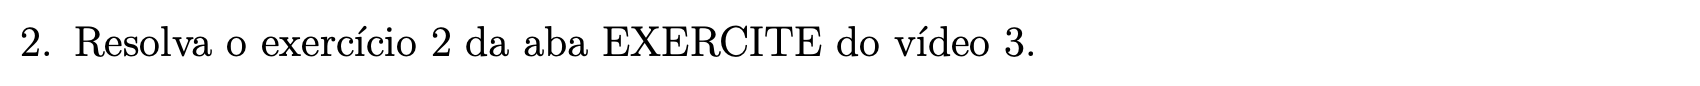

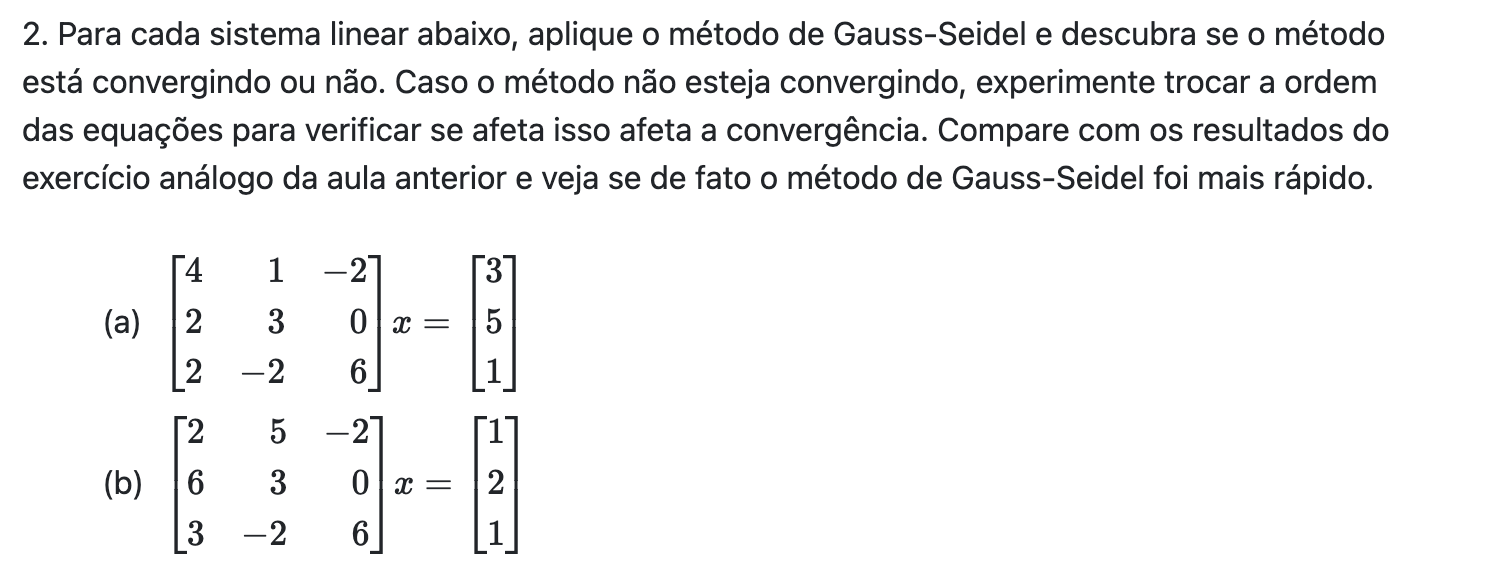

In [16]:
# a)

A = np.array([[4,1,-2], [2,3,0], [2,-2,6]])
b = np.array([3,5,1])

x0 = np.array([1.0,1.0,1.0]) # chute inicial

In [17]:
# Iteração 1:

x0[0] = calc_x1(x0, A, b)
x0[1] = calc_x2(x0, A, b)
x0[2] = calc_x3(x0, A, b)

x0

array([1.        , 1.        , 0.16666667])

In [18]:
# Iteração 2:

x0[0] = calc_x1(x0, A, b)
x0[1] = calc_x2(x0, A, b)
x0[2] = calc_x3(x0, A, b)

x0

array([0.58333333, 1.27777778, 0.39814815])

In [19]:
# Iteração 3:

x0[0] = calc_x1(x0, A, b)
x0[1] = calc_x2(x0, A, b)
x0[2] = calc_x3(x0, A, b)

x0

array([0.62962963, 1.24691358, 0.37242798])

In [20]:
# Solução exata:

np.matmul(np.linalg.inv(A), b)

array([0.625, 1.25 , 0.375])

In [21]:
def gauss_seidel(A, b, x0, tol=10**(-3), k_max=30, verbose=False):
    
    def __calcular_norma(X, inf=1):
        '''
        inf: 1 para norma infinito, 0 para norma 1
        '''
        return np.max(np.sum(np.abs(X), axis=inf))

    def __calcular_residuo(A, x, b, inf=1):
        '''
        inf: 1 para norma infinito, 0 para norma 1
        '''
        X = np.abs(np.matmul(A, x) - b.T)
        return __calcular_norma(X, inf)
           
    def __sassenfeld(A):
        n = len(A)
        beta = []
        
        beta.append(sum(np.abs(A[0,j]) for j in range(1,n)) / np.abs(A[0,0]))
        
        for i in range(1,n):
            sum_a = sum(np.abs(A[i,j]*beta[j]) for j in range(i))
            sum_b = sum(np.abs(A[i,j]) for j in range(i+1,n))
            beta.append((sum_a + sum_b) / np.abs(A[i,i]))
        
        print(f'betas Sassenfeld: {beta}')
        
        if np.max(beta) >= 1:
            print('Critério de Sassenfeld:')
            print('A matriz B não é diagonalmente dominante por linhas, portanto, não há garantia de convergência')
            print('')
            

    def __phi(Bs, c, x, k_max=20):
        return np.matmul(Bs, x) + c
    
    
    # Inicializa as variáveis:
    # Ax = b
    # (L + D + U)x = b
    # (L + D)x = -Ux + b
    # x = -(L + D)^-1 * Ux + (L + D)^-1 * b

    # phi(x) = Bs * x + c
    # Bs = -(L + D)^-1 * U
    # c = (L + D)^-1 * b
    
    D = np.diag(np.diag(A))
    L = np.tril(A - D)
    U = np.triu(A - D)
    LD_inv = np.linalg.inv(L + D)
    Bs = np.matmul(-LD_inv, U)
    c = np.matmul(LD_inv, b)
    
    # Verifica o critério de convergência
    
    # A norma de Bs deve ser < 1
    # Em outras palavras: Os elementos da diagonal sempre devem ser maior (em módulo)
    # do que a soma (em módulo) dos demais elementos da linha
    
    # Este critério é conhecido como critério das linhas
    # A matriz que satisfaz esta condição é chamada de matriz diagonalmente dominante por linhas
    
    # Outros critérios também podem ser considerados:
    # Se a matriz for definida positiva, o método é convergente
    # Pode-se utilizar o critério de Sasselfeld também
    
    if __calcular_norma(Bs) >= 1:
        print('Critério das linhas:')
        print('A matriz B não é diagonalmente dominante por linhas, portanto, não há garantia de convergência')
        print('')
        
    __sassenfeld(A)
    

    # Inicia o processo iterativo:
    k = 0
    while k < k_max:
        k += 1
        
        res = __calcular_residuo(A, x0, b)
        x_new = __phi(Bs, c, x0)
        step_size = __calcular_norma(x_new - x0)
        abs_err = np.sum(np.abs(np.matmul(A, x_new) - b))
        
        if verbose:
            print(f'Iteração {k}')
            print(f'>>> Resíduo na iteração: {res}')
            print(f'>>> Tamanho do passo: {step_size}')
            print(f'>>> Erro absoluto: {abs_err}')
            print(f'>>> x aproximado: {x_new.T[0]}')
        
        if abs_err <= tol:
            print('')
            print(f'Valor aproximado de x na iteração {k}: {x_new.T[0]}')
            print(f'Resíduo: {res}')
            print(f'Tamanho do passo: {step_size}')
            print(f'Erro absoluto: {abs_err}')
            return
        
        x0 = x_new

In [22]:
# b)

A = np.array([[2,5,-2], [6,3,0], [3,-2,6]])
b = np.array([[1], [2], [1]])
x0 = np.array([[1], [1], [1]])

gauss_seidel(A, b, x0, verbose=False)

Critério das linhas:
A matriz B não é diagonalmente dominante por linhas, portanto, não há garantia de convergência

betas Sassenfeld: [3.5, 7.0, 4.083333333333333]
Critério de Sassenfeld:
A matriz B não é diagonalmente dominante por linhas, portanto, não há garantia de convergência



In [23]:
A = np.array([[6,3,0], [2,5,-2], [3,-2,6]])
b = np.array([[2], [1], [1]])
x0 = np.array([[1], [1], [1]])

gauss_seidel(A, b, x0, verbose=False)

betas Sassenfeld: [0.5, 0.6, 0.45]

Valor aproximado de x na iteração 13: [0.27429418 0.11787308 0.0688106 ]
Resíduo: 1.9988253770879552
Tamanho do passo: 0.00020521587595487278
Erro absoluto: 0.0009482286971753684


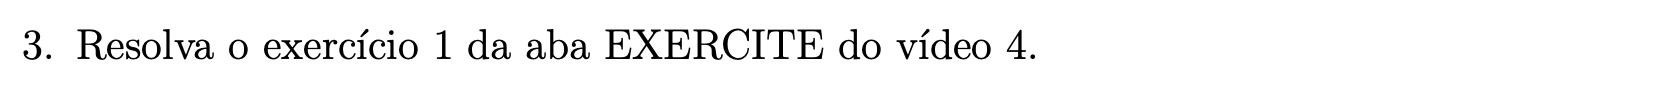

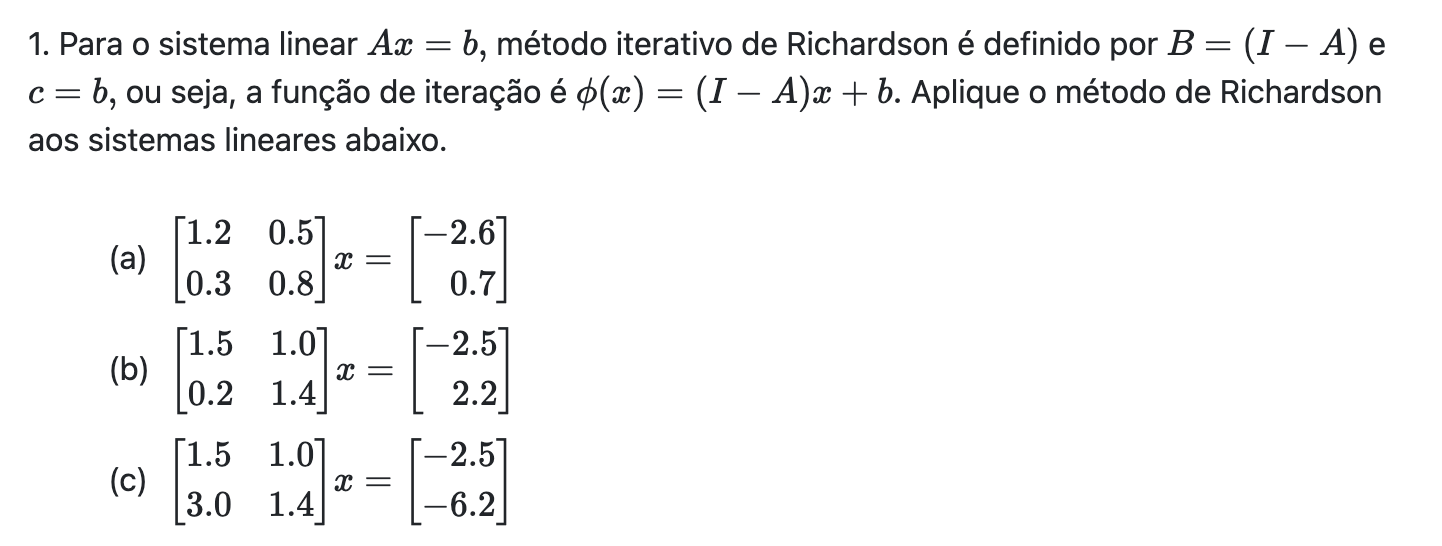

Condição de ponto fixo:

Seja $x^*$ a solução exata,

$\phi(\mathbf{x}^*) = \mathbf{x}^*$

<br>

$\phi(\mathbf{x}) = \mathbf{Bx} + \mathbf{c}$

<br>

Seja $\mathbf{x}^0$ a aproximação inicial,

$\mathbf{x}^{(k+1)} = \phi(\mathbf{x}^{(k)}) = \mathbf{Bx}^{(k)} + \mathbf{c}$ (estrutura padrão dos métodos iterativos estacionários, quando os vetores B e c são constantes durante todo o processo)

<br>

Este método é convergente?

Deve-se observar se a norma do vetor erro tende a zero

O método é convergente se $\mathbf{x}_{(k)} \to \mathbf{x}^*$, ou seja, se

$\lVert  \mathbf{e}^{(k)}  \rVert = \lVert  \mathbf{x}^{(k)} - \mathbf{x}^*  \rVert \to 0$

<br>

Como o erro varia em cada passo?

$\mathbf{e}^{(k)} = \mathbf{x}^{(k)} - \mathbf{x}^*$

$\mathbf{e}^{(k)} = \phi(\mathbf{x}^{(k-1)}) - \phi(\mathbf{x}^*)$

$\mathbf{e}^{(k)} = (\mathbf{Bx}^{(k-1)} + \mathbf{c}) - (\mathbf{Bx}^* + \mathbf{c})$

$\mathbf{e}^{(k)} = \mathbf{B}(\mathbf{x}^{(k-1)} - \mathbf{x}^*)$

$\mathbf{e}^{(k)} = \mathbf{Be}^{(k-1)}$

<br>

$\mathbf{e}^{(k)} = \mathbf{Be}^{(k-1)}$

$\mathbf{e}^{(k)} = \mathbf{B}(\mathbf{Be}^{(k-2)})$

$\mathbf{e}^{(k)} = \mathbf{B}^2(\mathbf{Be}^{(k-3)})$

$\mathbf{e}^{(k)} = \ldots$

$\mathbf{e}^{(k)} = \mathbf{B}^k \mathbf{e}^{(0)}$

<br>

Propriedade para norma produto matrix vetor:

$\mathbf{e}^{(k)} = \mathbf{B}^k \mathbf{e}^{(0)} \implies \lVert  \mathbf{e}^{(k)}  \rVert \leq \lVert  \mathbf{B}  \rVert^k \cdot \lVert  \mathbf{e}^{(0)}  \rVert$

Portanto, é suficiente que exigir que $\mathbf{B}$ seja menor do que 1, pois assim à medida que $k$ tende ao infinito, $\mathbf{B}$ tende a zero

<br>

Assim sendo, o critério de convergência fica definido por

$\lVert  \mathbf{B}  \rVert \implies x^{(k)} \to x^*$


In [24]:
# a)

A = np.array([[1.2, 0.5], [0.3, 0.8]])
b = np.array([[-2.6], [0.7]])

In [25]:
I = np.array([[1.0,0.0], [0.0,1.0]])
I

array([[1., 0.],
       [0., 1.]])

In [26]:
B = I - A
B

array([[-0.2, -0.5],
       [-0.3,  0.2]])

In [27]:
c = copy(b)

In [28]:
def phi(B,x0,c):
    return np.matmul(B,x0) + c

In [29]:
# Verifica se atende o critério de convergência

np.linalg.norm(B) # A norma é menor que 1, portanto há garantia de convergência

0.648074069840786

In [30]:
np.matmul(np.linalg.inv(A), b)

array([[-3.],
       [ 2.]])

In [31]:
# Chute inicial:

x0 = np.array([[-2], [1]])

In [32]:
# Iteração 1:
x0 = phi(B, x0, c)
x0

array([[-2.7],
       [ 1.5]])

In [33]:
# Iteração 2:
x0 = phi(B, x0, c)
x0

array([[-2.81],
       [ 1.81]])

In [34]:
# Iteração 3:
x0 = phi(B, x0, c)
x0

array([[-2.943],
       [ 1.905]])

In [35]:
# Iteração 4:
x0 = phi(B, x0, c)
x0

array([[-2.9639],
       [ 1.9639]])

In [36]:
# Iteração 5:
x0 = phi(B, x0, c)
x0

array([[-2.98917],
       [ 1.98195]])

In [37]:
# Iteração 6:
x0 = phi(B, x0, c)
x0

array([[-2.993141],
       [ 1.993141]])

In [38]:
# b)

A = np.array([[1.5, 1], [0.2, 1.4]])
b = np.array([[-2.5], [2.2]])

I = np.array([[1.0,0.0], [0.0,1.0]])
B = I - A
c = copy(b)

In [39]:
# Verifica se atende o critério de convergência

np.linalg.norm(B) # A norma é >= 1, portanto não há garantia de convergência

1.2041594578792296

In [40]:
# c)

A = np.array([[1.5, 1], [3, 1.4]])
b = np.array([[-2.5], [-6.2]])

I = np.array([[1.0,0.0], [0.0,1.0]])
B = I - A
c = copy(b)

In [41]:
# Verifica se atende o critério de convergência

np.linalg.norm(B) # A norma é >= 1, portanto não há garantia de convergência

3.2264531609803355

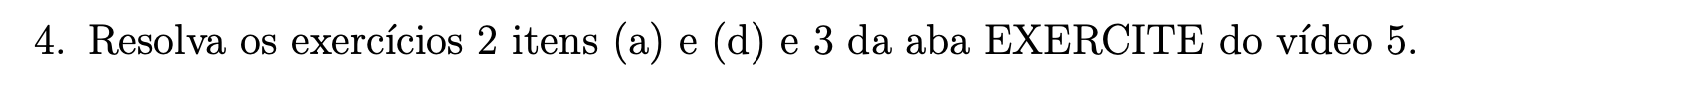

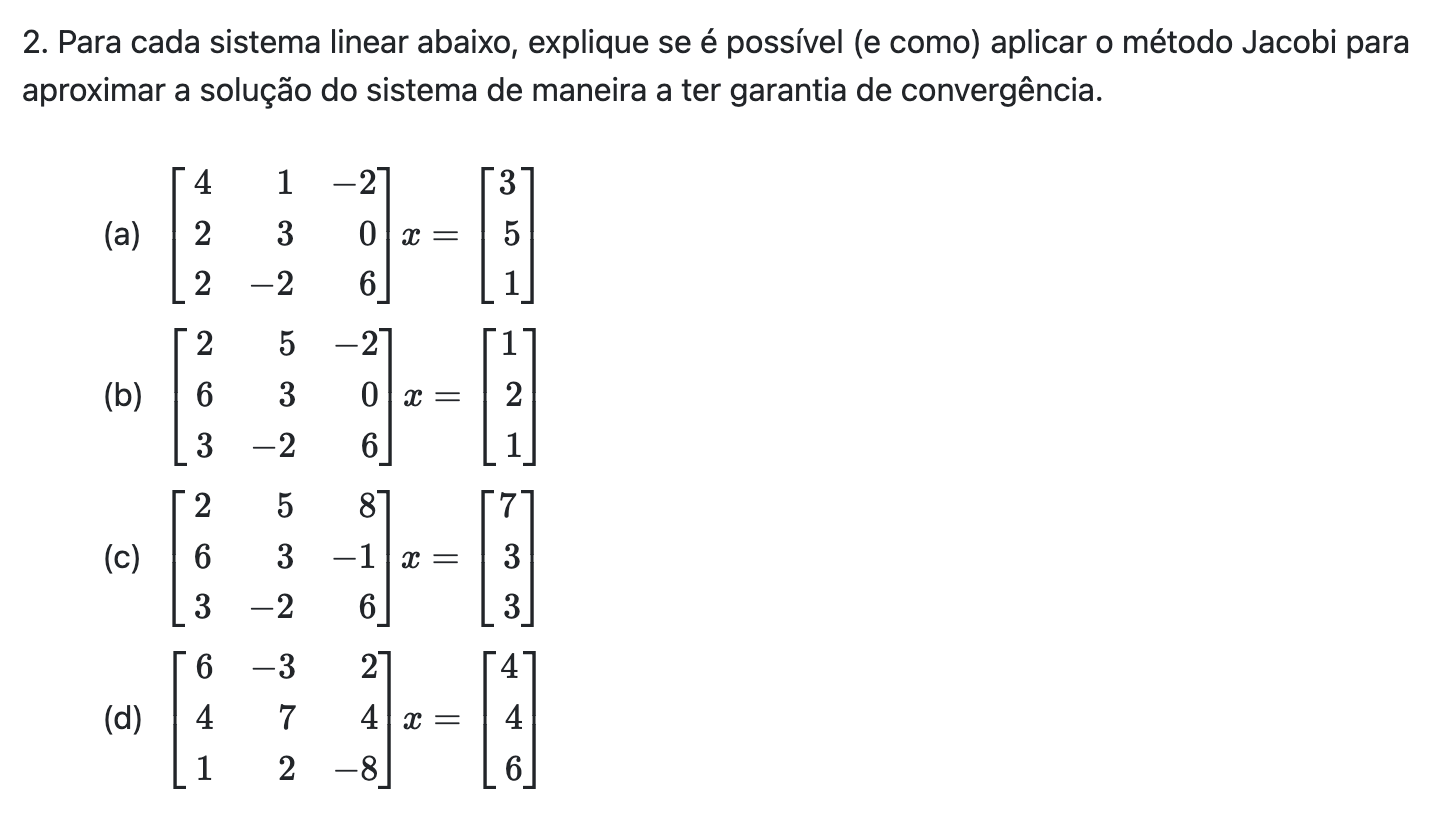

$\mathbf{Ax} = \mathbf{b}$

$\mathbf{A} = \mathbf{L} + \mathbf{D} + \mathbf{U}$

$(\mathbf{L} + \mathbf{D} + \mathbf{U})\mathbf{x} = \mathbf{b}$

$\mathbf{Dx} = -(\mathbf{L} + \mathbf{U})\mathbf{x} +  \mathbf{b}$

$\mathbf{x} = -\mathbf{D}^{-1}(\mathbf{L} + \mathbf{U})\mathbf{x} + \mathbf{D}^{-1} \mathbf{b}$

<hr>

Função de iteração:

$\phi(\mathbf{x}) = \mathbf{Bx} + \mathbf{c}$

$\mathbf{B} = -\mathbf{D}^{-1}(\mathbf{L} + \mathbf{U})$

$\mathbf{c} = \mathbf{D}^{-1} \mathbf{b}$

$\phi(\mathbf{x}) = -\mathbf{D}^{-1}(\mathbf{L} + \mathbf{U})\mathbf{x} + \mathbf{D}^{-1} \mathbf{b}$

<hr>

Critério de convergência:

A norma de $\mathbf{B}$ deve ser < 1

Em outras palavras: Os elementos da diagonal sempre devem ser maior (em módulo) do que a soma (em módulo) dos demais elementos da linha
    
Este critério é conhecido como critério das linhas

A matriz que satisfaz esta condição é chamada de matriz diagonalmente dominante por linhas

In [42]:
# a)

A = np.array([[4,1,-2], [2,3,0], [2,-2,6]])
b = np.array([[3], [5], [1]])

In [43]:
D = np.diag(np.diag(A))
L = np.tril(A - D)
U = np.triu(A - D)

In [44]:
D

array([[4, 0, 0],
       [0, 3, 0],
       [0, 0, 6]])

In [45]:
L

array([[ 0,  0,  0],
       [ 2,  0,  0],
       [ 2, -2,  0]])

In [46]:
U

array([[ 0,  1, -2],
       [ 0,  0,  0],
       [ 0,  0,  0]])

In [47]:
D_inv = np.linalg.inv(D)
B = np.matmul(-D_inv, L+U)
c = np.matmul(D_inv, b)

In [48]:
B

array([[ 0.        , -0.25      ,  0.5       ],
       [-0.66666667,  0.        ,  0.        ],
       [-0.33333333,  0.33333333,  0.        ]])

In [49]:
np.linalg.norm(B, ord=np.infty) # A norma é < 1, portanto, há garantia de convergência

0.75

In [50]:
# d)

A = np.array([[6,-3,2], [4,7,4], [1,2,-8]])
b = np.array([[4], [4], [6]])

In [51]:
D = np.diag(np.diag(A))
L = np.tril(A - D)
U = np.triu(A - D)

D_inv = np.linalg.inv(D)
B = np.matmul(-D_inv, L+U)
c = np.matmul(D_inv, b)

In [52]:
np.linalg.norm(B, ord=np.infty) # A norma é >= 1, portanto, não há garantia de convergência

1.1428571428571428

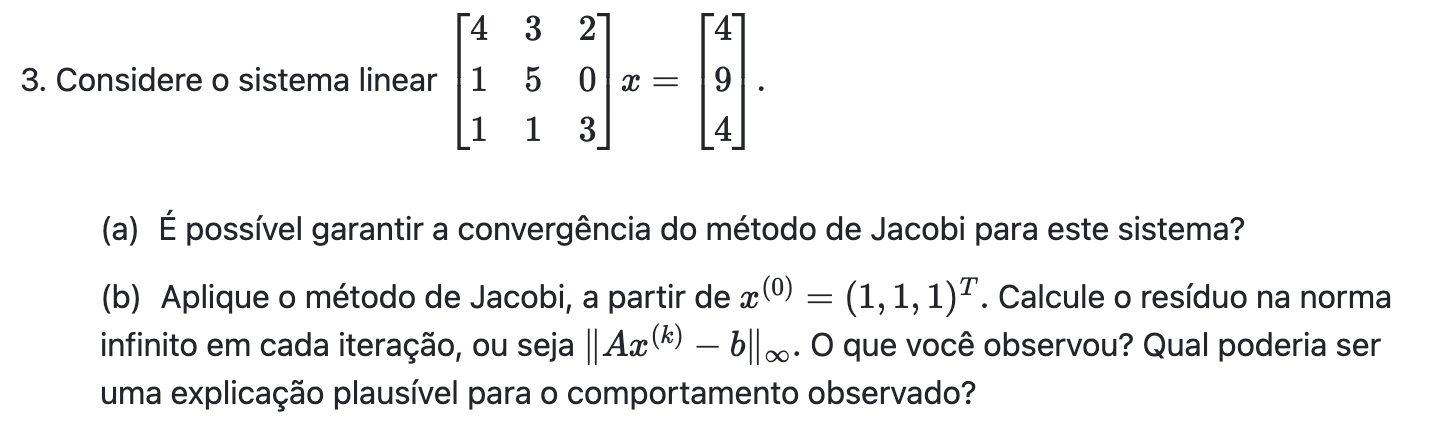

In [53]:
A = np.array([[4,3,2], [1,5,0], [1,1,3]])
b = np.array([[4], [9], [4]])


In [54]:
D = np.diag(np.diag(A))
L = np.tril(A - D)
U = np.triu(A - D)

D_inv = np.linalg.inv(D)
B = np.matmul(-D_inv, L+U)
c = np.matmul(D_inv, b)

np.linalg.norm(B, ord=np.infty) # A norma é >= 1, portanto, não há garantia de convergência

1.25

In [55]:
x0 = np.array([[1], [1], [1]])

def phi(x0, B, c):
    return np.matmul(B, x0) + c

In [56]:
# Iteração 1:

x0 = phi(x0, B, c)
x0

array([[-0.25      ],
       [ 1.6       ],
       [ 0.66666667]])

In [57]:
np.linalg.norm(np.matmul(A, x0) - b, ord=np.infty)

1.25

In [58]:
# Iteração 2:

x0 = phi(x0, B, c)
x0

array([[-0.53333333],
       [ 1.85      ],
       [ 0.88333333]])

In [59]:
np.linalg.norm(np.matmul(A, x0) - b, ord=np.infty)

1.1833333333333336

In [60]:
# Iteração 3:

x0 = phi(x0, B, c)
x0

array([[-0.82916667],
       [ 1.90666667],
       [ 0.89444444]])

In [61]:
np.linalg.norm(np.matmul(A, x0) - b, ord=np.infty)

0.2958333333333343

In [62]:
# Iteração 4:

x0 = phi(x0, B, c)
x0

array([[-0.87722222],
       [ 1.96583333],
       [ 0.97416667]])

In [63]:
np.linalg.norm(np.matmul(A, x0) - b, ord=np.infty)

0.3369444444444438

In [64]:
# Iteração 5:

x0 = phi(x0, B, c)
x0

array([[-0.96145833],
       [ 1.97544444],
       [ 0.97046296]])

In [65]:
np.linalg.norm(np.matmul(A, x0) - b, ord=np.infty)

0.08423611111111029

In [66]:
# Iteração 6:

x0 = phi(x0, B, c)
x0

array([[-0.96681481],
       [ 1.99229167],
       [ 0.99533796]])

In [67]:
np.linalg.norm(np.matmul(A, x0) - b, ord=np.infty)

0.10029166666666622

In [68]:
# Iteração 7:

x0 = phi(x0, B, c)
x0

array([[-0.99188773],
       [ 1.99336296],
       [ 0.99150772]])

In [69]:
np.linalg.norm(np.matmul(A, x0) - b, ord=np.infty)

0.025072916666667666

In [70]:
np.matmul(np.linalg.inv(A),b) # solução exata

array([[-1.],
       [ 2.],
       [ 1.]])

Mesmo sem garantias de convergência, o algoritmo convergiu. A explicação possível é que o fato de não haver garantias de convergência não quer dizer que não haverá convergência.

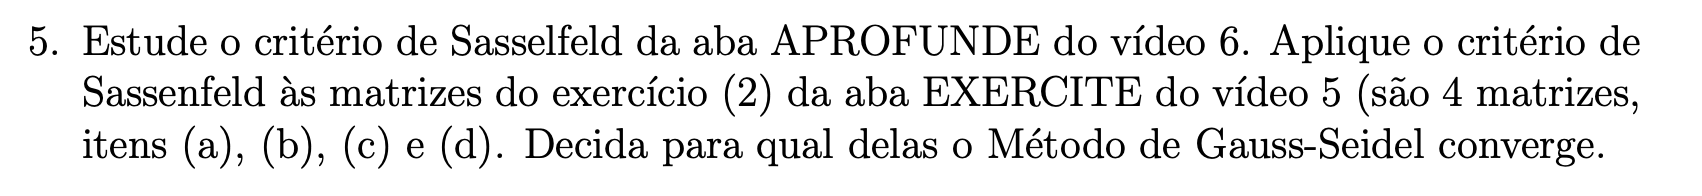

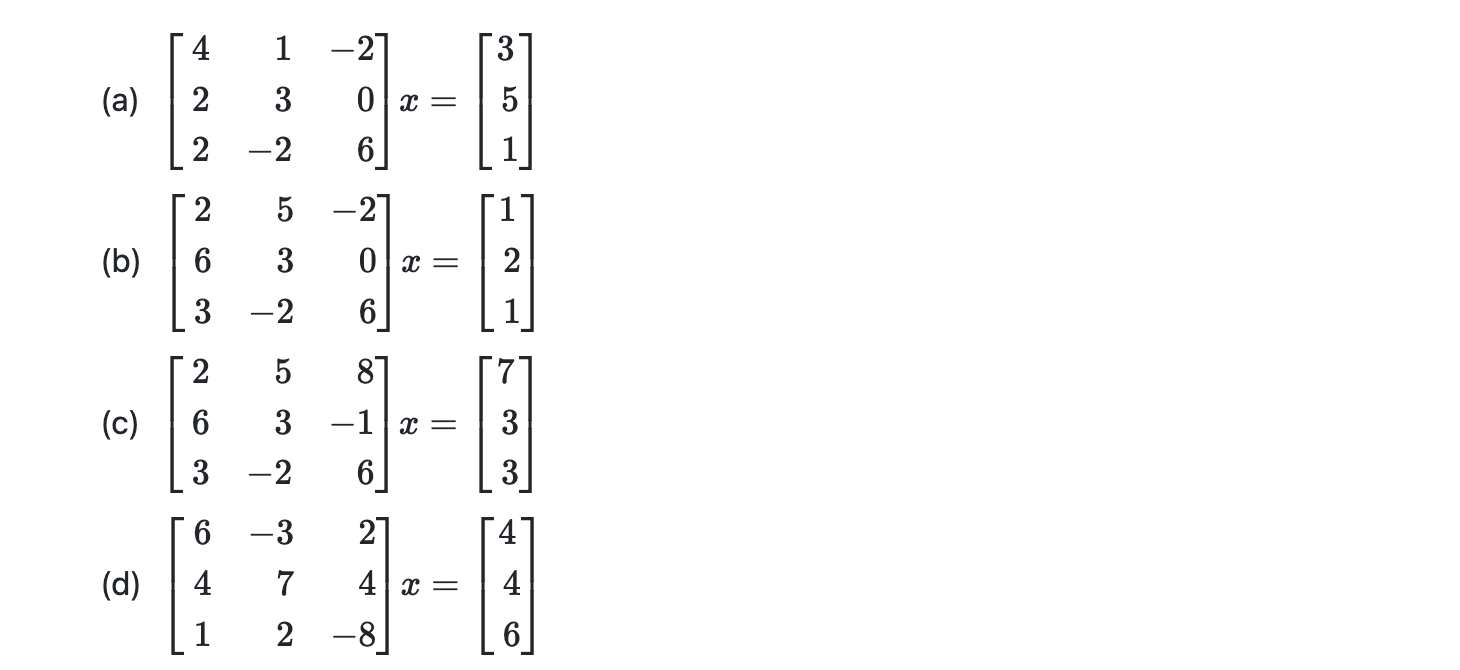

Critério de Sassenfeld

$\beta_1 = \dfrac{\sum_{j=2}^n |a_{1j}|}{|a_{11}|}$

$\beta_i = \dfrac{\sum_{j=1}^{i-1} \beta_j|a_{ij}| + \sum_{j=i+1}^n |a_{ij}|}{|a_{ii}|}$

In [71]:
def sassenfeld(A):
    n = len(A)
    beta = []

    beta.append(sum(np.abs(A[0,j]) for j in range(1,n)) / np.abs(A[0,0]))

    for i in range(1,n):
        sum_a = sum(np.abs(A[i,j]*beta[j]) for j in range(i))
        sum_b = sum(np.abs(A[i,j]) for j in range(i+1,n))
        beta.append((sum_a + sum_b) / np.abs(A[i,i]))

    print(f'betas Sassenfeld: {beta}')

    if np.max(beta) >= 1:
        print('Critério de Sassenfeld:')
        print('A matriz B não é diagonalmente dominante por linhas, portanto, não há garantia de convergência')
        print('')

In [72]:
A = np.array([[4,1,-2], [2,3,0], [2,-2,6]])

In [73]:
sassenfeld(A)

betas Sassenfeld: [0.75, 0.5, 0.4166666666666667]


In [74]:
A = np.array([[2,5,-2], [6,3,0], [3,-2,6]])

In [75]:
sassenfeld(A)

betas Sassenfeld: [3.5, 7.0, 4.083333333333333]
Critério de Sassenfeld:
A matriz B não é diagonalmente dominante por linhas, portanto, não há garantia de convergência



In [76]:
A = np.array([[2,5,8], [6,3,-1], [3,-2,6]])

In [77]:
sassenfeld(A)

betas Sassenfeld: [6.5, 13.333333333333334, 7.6944444444444455]
Critério de Sassenfeld:
A matriz B não é diagonalmente dominante por linhas, portanto, não há garantia de convergência



In [78]:
A = np.array([[6,-3,2], [4,7,4], [1,2,-8]])

In [79]:
sassenfeld(A)

betas Sassenfeld: [0.8333333333333334, 1.0476190476190477, 0.3660714285714286]
Critério de Sassenfeld:
A matriz B não é diagonalmente dominante por linhas, portanto, não há garantia de convergência



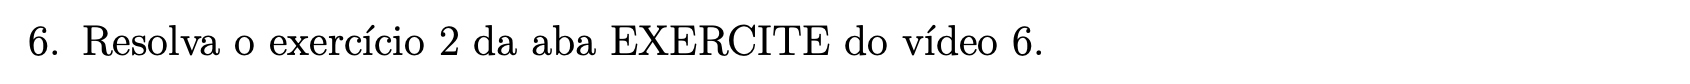

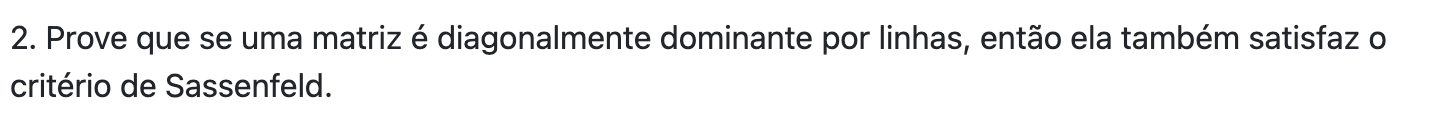

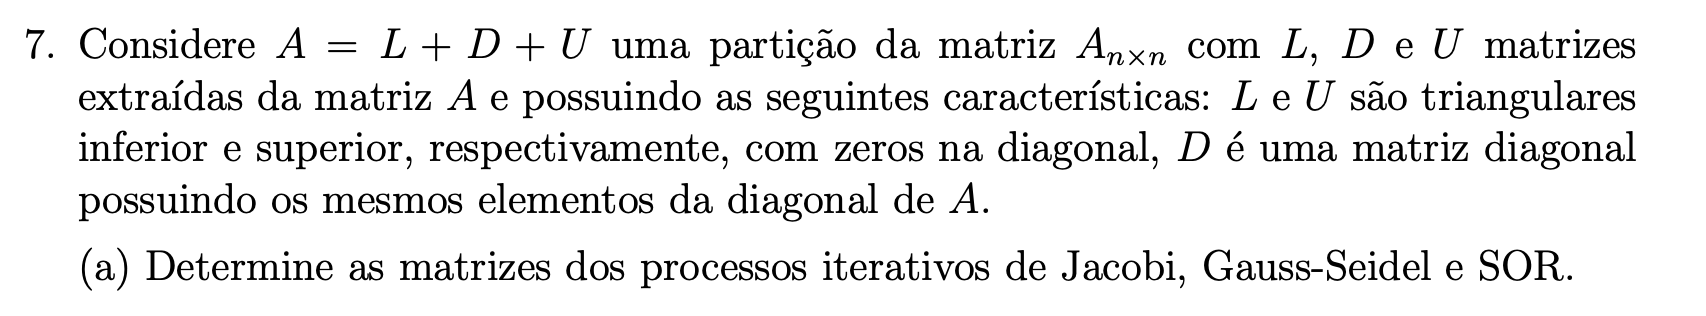

Jacobi:

$\mathbf{Ax} = \mathbf{b}$

$\mathbf{A} = \mathbf{L} + \mathbf{D} + \mathbf{U}$

$(\mathbf{L} + \mathbf{D} + \mathbf{U})\mathbf{x} = \mathbf{b}$

$\mathbf{Dx} = -(\mathbf{L} + \mathbf{U})\mathbf{x} +  \mathbf{b}$

$\mathbf{x}^{(k+1)} = -\mathbf{D}^{-1}(\mathbf{L} + \mathbf{U})\mathbf{x}^{(k)} + \mathbf{D}^{-1} \mathbf{b}$

<br>

Função de iteração:

$\phi(\mathbf{x}) = \mathbf{Bx} + \mathbf{c}$

$\mathbf{B} = -\mathbf{D}^{-1}(\mathbf{L} + \mathbf{U})$

$\mathbf{c} = \mathbf{D}^{-1} \mathbf{b}$

$\phi(\mathbf{x}) = -\mathbf{D}^{-1}(\mathbf{L} + \mathbf{U})\mathbf{x} + \mathbf{D}^{-1} \mathbf{b}$

<hr>

Gauss-Seidel:

$\mathbf{Ax} = \mathbf{b}$

$\mathbf{A} = \mathbf{L} + \mathbf{D} + \mathbf{U}$

$(\mathbf{L} + \mathbf{D} + \mathbf{U})\mathbf{x} = \mathbf{b}$

$(\mathbf{L} + \mathbf{D})\mathbf{x} = -\mathbf{Ux} + \mathbf{b}$

$\mathbf{x} = -(\mathbf{L} + \mathbf{D})^{-1}\mathbf{Ux} + (\mathbf{L} + \mathbf{D})^{-1}\mathbf{b}$

<br>

Função de iteração:

$\phi(\mathbf{x}) = \mathbf{Bx} + \mathbf{c}$

$\mathbf{B} = -(\mathbf{L} + \mathbf{D})^{-1}\mathbf{U}$

$\mathbf{c} = (\mathbf{L} + \mathbf{D})^{-1}\mathbf{b}$

$\phi(\mathbf{x}) =-(\mathbf{L} + \mathbf{D})^{-1}\mathbf{Ux} + (\mathbf{L} + \mathbf{D})^{-1}\mathbf{b}$

<hr>


SOR:

$\mathbf{Ax} = \mathbf{b}$

$\mathbf{A} = \mathbf{L} + \mathbf{D} + \mathbf{U}$

$(\mathbf{L} + \mathbf{D} + \mathbf{U})\mathbf{x} = \mathbf{b}$

$(\omega \mathbf{L} + \mathbf{D})\mathbf{x} = -[\omega \mathbf{U} + (\omega-1)\mathbf{D}]\mathbf{x} + \omega \mathbf{b}$

$\mathbf{x} = -(\omega \mathbf{L} + \mathbf{D})^{-1}[\omega \mathbf{U} + (\omega-1)\mathbf{D}]\mathbf{x} + (\omega \mathbf{L} + \mathbf{D})^{-1}\omega \mathbf{b}$

Função de iteração:

$\phi(\mathbf{x}) = \mathbf{Bx} + \mathbf{c}$

$\mathbf{B} = -(\omega \mathbf{L} + \mathbf{D})^{-1}[\omega \mathbf{U} + (\omega-1)\mathbf{D}]$

$\mathbf{c} = (\omega \mathbf{L} + \mathbf{D})^{-1}\omega \mathbf{b}$

$\phi(\mathbf{x}) =-(\omega \mathbf{L} + \mathbf{D})^{-1}[\omega \mathbf{U} + (\omega-1)\mathbf{D}]\mathbf{x} + (\omega \mathbf{L} + \mathbf{D})^{-1}\omega \mathbf{b}$

<hr>

Matrizes:

$\mathbf{M}_{J} = -\mathbf{D}^{-1}(\mathbf{L} + \mathbf{U})$

$\mathbf{M}_{GS} = -(\mathbf{L} + \mathbf{D})^{-1}\mathbf{U}$

$\mathbf{M}_{SOR} = -(\omega \mathbf{L} + \mathbf{D})^{-1}[\omega \mathbf{U} + (\omega-1)\mathbf{D}]$



In [80]:
def SOR(A, b, x0, omega=1, tol=10**(-3), k_max=30, verbose=False):
    
    def __calcular_norma(X, inf=1):
        '''
        inf: 1 para norma infinito, 0 para norma 1
        '''
        return np.max(np.sum(np.abs(X), axis=inf))

    def __calcular_residuo(A, x, b, inf=1):
        '''
        inf: 1 para norma infinito, 0 para norma 1
        '''
        X = np.abs(np.matmul(A, x) - b.T)
        return __calcular_norma(X, inf)
           
    def __sassenfeld(A):
        n = len(A)
        beta = []
        
        beta.append(sum(np.abs(A[0,j]) for j in range(1,n)) / np.abs(A[0,0]))
        
        for i in range(1,n):
            sum_a = sum(np.abs(A[i,j]*beta[j]) for j in range(i))
            sum_b = sum(np.abs(A[i,j]) for j in range(i+1,n))
            beta.append((sum_a + sum_b) / np.abs(A[i,i]))
        
        print(f'betas Sassenfeld: {beta}')
        
        if np.max(beta) >= 1:
            print('Critério de Sassenfeld:')
            print('A matriz B não é diagonalmente dominante por linhas, portanto, não há garantia de convergência')
            print('')
            

    def __phi(Bs, c, x, k_max=20):
        return np.matmul(Bs, x) + c
    
    
    # Inicializa as variáveis:
    D = np.diag(np.diag(A))
    L = np.tril(A - D)
    U = np.triu(A - D)
    LD_inv = np.linalg.inv(omega*L + D)
    Bs = np.matmul(-LD_inv, omega*U + (omega-1)*D)
    c = np.matmul(LD_inv, omega*b)
    
    # Verifica o critério de convergência    
    __sassenfeld(A)
    

    # Inicia o processo iterativo:
    k = 0
    while k < k_max:
        k += 1
        
        res = __calcular_residuo(A, x0, b)
        x_new = __phi(Bs, c, x0)
        step_size = __calcular_norma(x_new - x0)
        abs_err = np.sum(np.abs(np.matmul(A, x_new) - b))
        
        if verbose:
            print(f'Iteração {k}')
            print(f'>>> Resíduo na iteração: {res}')
            print(f'>>> Tamanho do passo: {step_size}')
            print(f'>>> Erro absoluto: {abs_err}')
            print(f'>>> x aproximado: {x_new.T[0]}')
        
        if abs_err <= tol:
            print('')
            print(f'Valor aproximado de x na iteração {k}: {x_new.T[0]}')
            print(f'Resíduo: {res}')
            print(f'Tamanho do passo: {step_size}')
            print(f'Erro absoluto: {abs_err}')
            return
        
        x0 = x_new

In [81]:
A = np.array([[6,3,0], [2,5,-2], [3,-2,6]])
b = np.array([[2], [1], [1]])
x0 = np.array([[1], [1], [1]])

In [82]:
gauss_seidel(A, b, x0)

betas Sassenfeld: [0.5, 0.6, 0.45]

Valor aproximado de x na iteração 13: [0.27429418 0.11787308 0.0688106 ]
Resíduo: 1.9988253770879552
Tamanho do passo: 0.00020521587595487278
Erro absoluto: 0.0009482286971753684


In [83]:
omega=1

SOR(A, b, x0, omega)

betas Sassenfeld: [0.5, 0.6, 0.45]

Valor aproximado de x na iteração 13: [0.27429418 0.11787308 0.0688106 ]
Resíduo: 1.9988253770879552
Tamanho do passo: 0.00020521587595487278
Erro absoluto: 0.0009482286971753684


In [84]:
omega=1.2

SOR(A, b, x0, omega)

betas Sassenfeld: [0.5, 0.6, 0.45]

Valor aproximado de x na iteração 10: [0.27453318 0.11767525 0.06860803]
Resíduo: 1.999253836940024
Tamanho do passo: 0.0001492326119951759
Erro absoluto: 0.0005541976007805705


In [85]:
omega=0.8

SOR(A, b, x0, omega)

betas Sassenfeld: [0.5, 0.6, 0.45]

Valor aproximado de x na iteração 20: [0.27434079 0.11784291 0.06879899]
Resíduo: 1.999357132690662
Tamanho do passo: 9.932502274444255e-05
Erro absoluto: 0.0008551903926887761


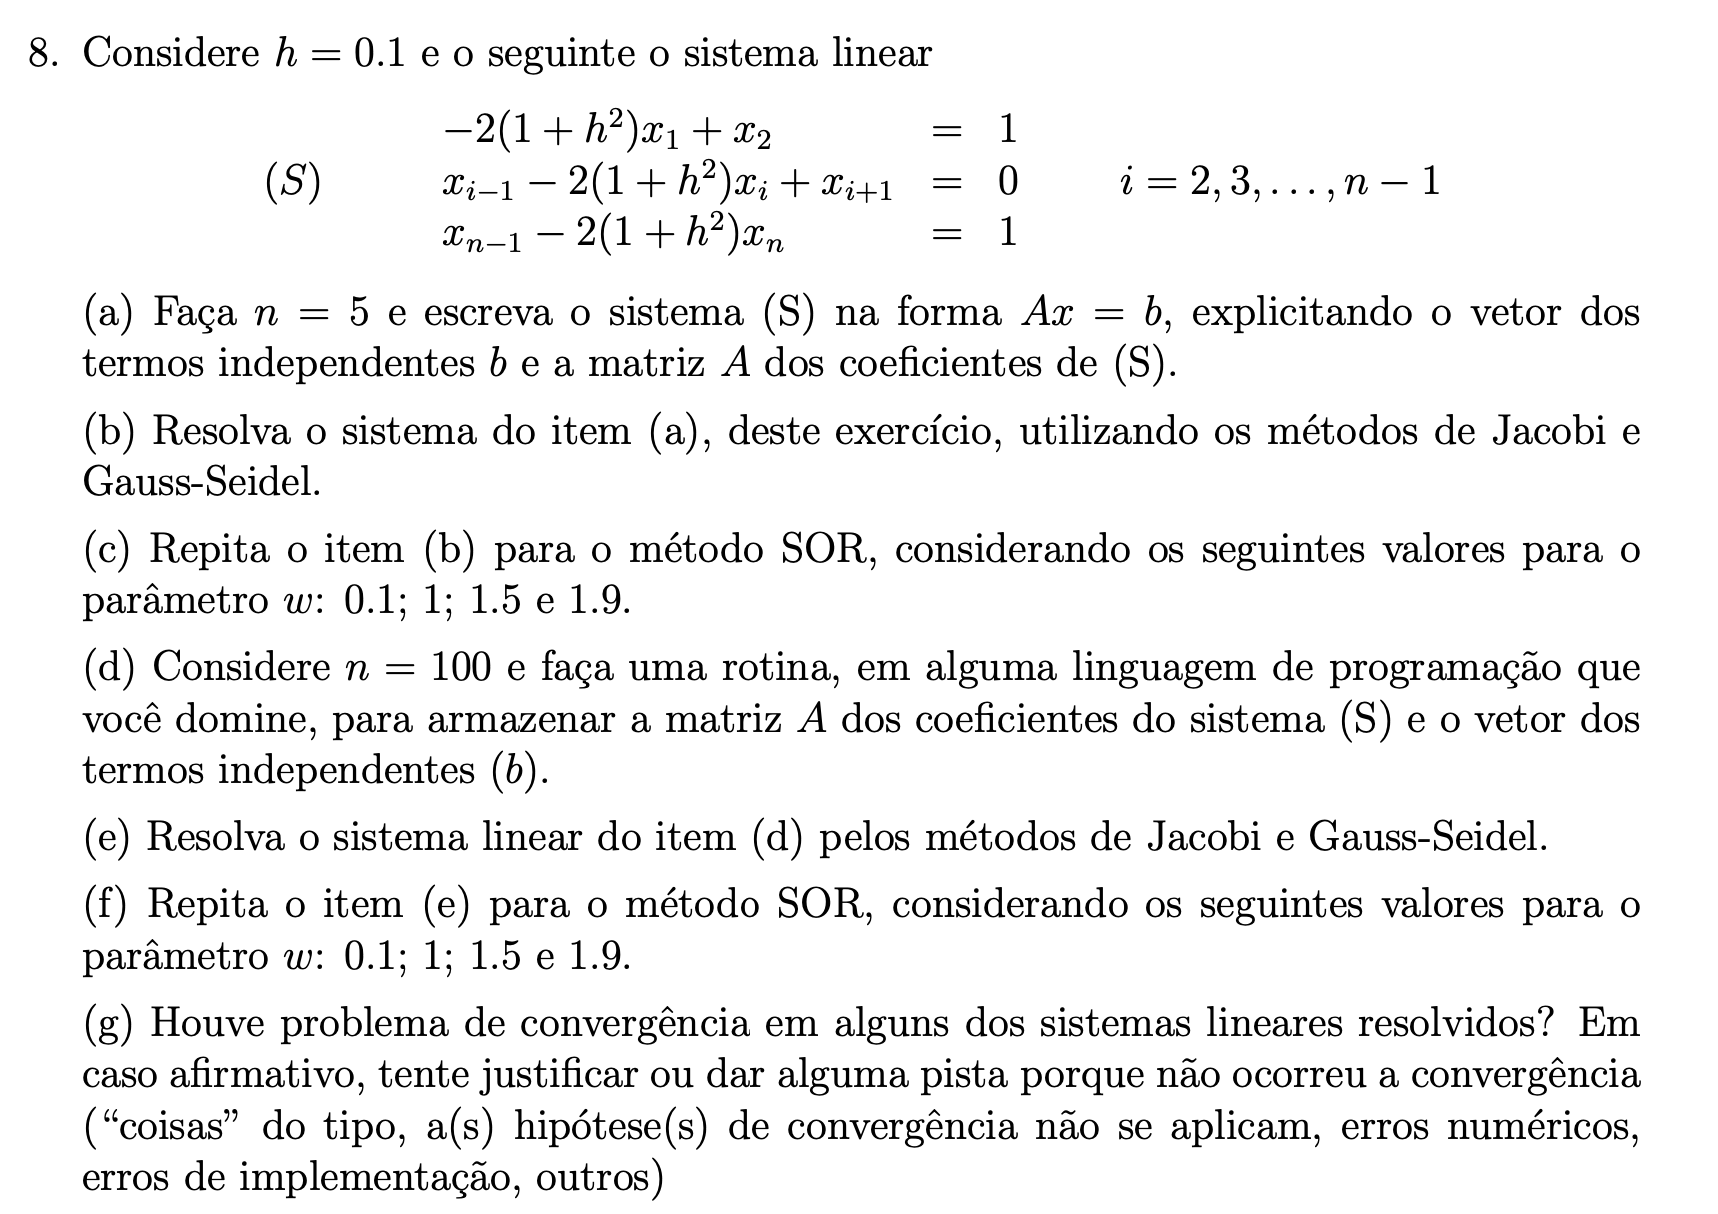

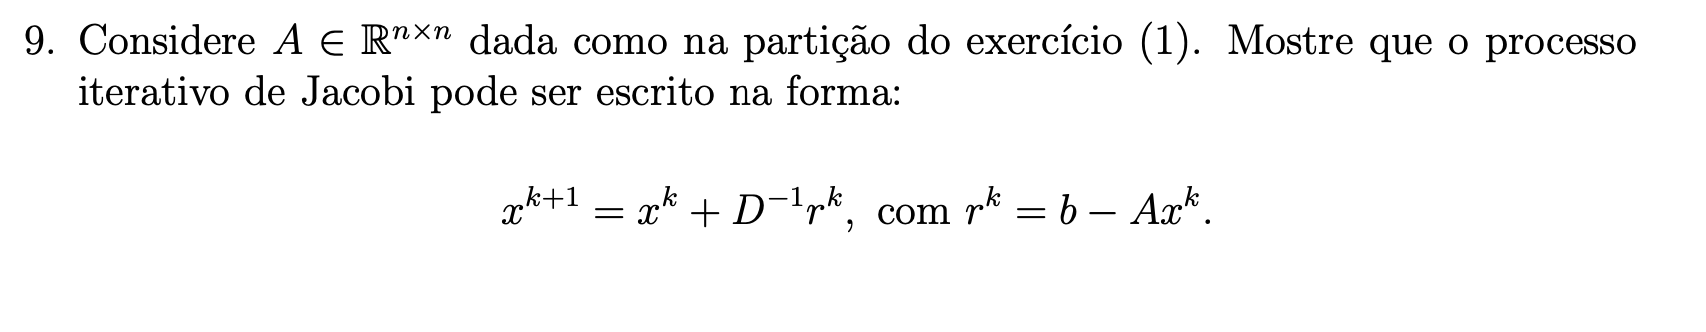

$\mathbf{x}^{(k+1)} = \mathbf{x}^{(k)} + \mathbf{D}^{-1} \mathbf{r}^{(k)}$

$\mathbf{x}^{(k+1)} = \mathbf{x}^{(k)} + \mathbf{D}^{-1} (\mathbf{b} - \mathbf{A}\mathbf{x}^{(k)})$

$\mathbf{x}^{(k+1)} = \mathbf{x}^{(k)} + \mathbf{D}^{-1}\mathbf{b} - \mathbf{D}^{-1}\mathbf{A}\mathbf{x}^{(k)}$

$\mathbf{x}^{(k+1)} = \mathbf{x}^{(k)} + \mathbf{D}^{-1}\mathbf{b} - \mathbf{D}^{-1}(\mathbf{L} + \mathbf{D} + \mathbf{U})\mathbf{x}^{(k)}$

$\mathbf{x}^{(k+1)} = \mathbf{x}^{(k)} + \mathbf{D}^{-1}\mathbf{b} - \mathbf{D}^{-1}(\mathbf{L} + \mathbf{U}) - \mathbf{D}^{-1}\mathbf{D}\mathbf{x}^{(k)}$

$\mathbf{x}^{(k+1)} = \mathbf{x}^{(k)} + \mathbf{D}^{-1}\mathbf{b} - \mathbf{D}^{-1}(\mathbf{L} + \mathbf{U}) - 
\mathbf{I}\mathbf{x}^{(k)}$

$\mathbf{x}^{(k+1)} = \mathbf{x}^{(k)} + \mathbf{D}^{-1}\mathbf{b} - \mathbf{D}^{-1}(\mathbf{L} + \mathbf{U}) - \mathbf{x}^{(k)}$

$\mathbf{x}^{(k+1)} = \mathbf{D}^{-1}\mathbf{b} - \mathbf{D}^{-1}(\mathbf{L} + \mathbf{U})$

$\mathbf{x}^{(k+1)} = - \mathbf{D}^{-1}(\mathbf{L} + \mathbf{U}) + \mathbf{D}^{-1}\mathbf{b}$

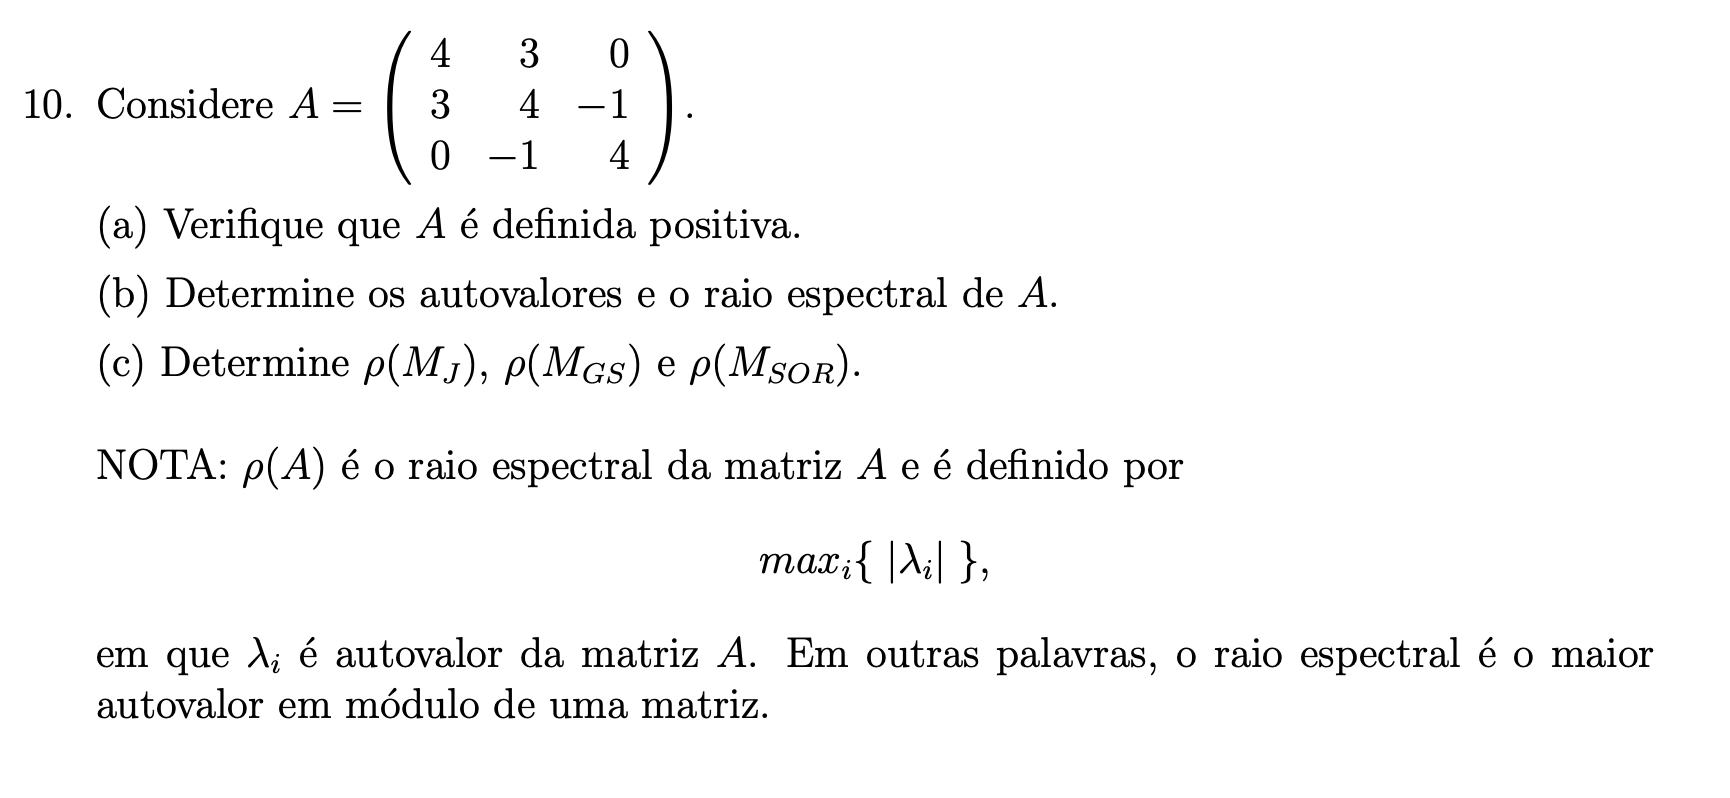

In [86]:
A = np.array([[4,3,0], [3,4,-1], [0,-1,4]])

In [87]:
# a)

# Uma matriz simétrica é definida positiva se e os determinantes dos menores principais forem positivos

# Determinante do primeiro menor principal:

A[0,0]

4

In [88]:
# Determinante do segundo menor principal:

np.linalg.det(A[:2,:2])

6.999999999999999

In [89]:
# Portanto, a matriz A é definida positiva

b)

$\mathbf{Av} = \lambda \mathbf{v}$

$
\left\{
\begin{array}{lcr}
4v_1 + 3v_2 = \lambda v_1 \\
3v_1 + 4v_2 - v_3 = \lambda v_2 \\
-v_2 + 4v_3 = \lambda v_3
\end{array}
\right.
$

$
\left\{
\begin{array}{lcr}
(4 - \lambda)v_1 + 3v_2 = 0 \\
3v_1 + (4 - \lambda)v_2 - v_3 = 0 \\
-v_2 + (4 - \lambda)v_3 = 0
\end{array}
\right.
$

Para que o sistema tenha solução não nula, o determinante da matriz dos coeficientes deve ser igual a zero.

$\mathbf{E} = \begin{bmatrix} 
    (4 - \lambda) & 3 & 0 \\
    3 & (4 - \lambda) & -1 \\
    0 & -1 & (4 - \lambda) \\
\end{bmatrix}$

$\det (E) = (4-\lambda)^3 - [(4-\lambda) + 9(4-\lambda)]$

$\det (E) = (4-\lambda)^3 - 10(4-\lambda)$

$\det (E) = [(4)^3 - 3(4)^2(\lambda) + 3(4)\lambda)^2 - \lambda^3] - 10(4-\lambda)$

$\det (E) = 64 - 48\lambda + 12\lambda^2 - \lambda^3 - 10(4-\lambda)$

$\det (E) = 64 - 48\lambda + 12\lambda^2 - \lambda^3 - 40 + 10\lambda$

$\det (E) = - \lambda^3 + 12\lambda^2 - 48\lambda + 10\lambda + 64 - 40 $

$\det (E) = - \lambda^3 + 12\lambda^2 - 38\lambda + 24$

<br>

$- \lambda^3 + 12\lambda^2 - 38\lambda + 24 = 0$

Raízes:

$\lambda = 4$

$\lambda = 4 - \sqrt{10}$

$\lambda = 4 + \sqrt{10}$

<hr>

$\rho(\mathbf{A}) = 4 + \sqrt{10}$